# Задача классификации

## 0.1.Импорт библиотек

In [1]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визу

## 0.2. Описание задачи

Имея информацию с опрошенных пациентов (без серьезных медицинских исследований), нужно спрогнозировать риск сердечно-сосудистых заболеваний

## 1. Загрузка&Просмотр данных 

In [2]:
data_raw = pd.read_csv('dataset.csv')

Количество объектов:

In [3]:
data_raw.shape[0]

253680

Количество признаков:

In [4]:
data_raw.shape[1]

22

Сам датасет:

In [5]:
data_raw

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [6]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

| Название столбца (признака) | Описание | Значения |
|------------------------|---------|---------|
| **HeartDiseaseorAttack**  | Ишемическая болезнь сердца (ИБС) или инфаркт миокарда (ИМ) | `0` - нет, `1` - есть |
| **HighBP**               | Высокое кровяное давление | `0` - нет, `1` - есть |
| **HighChol**             | Повышенный уровень холестерина | `0` - нет, `1` - есть |
| **CholCheck**            | Проверка уровня холестерина за последние 5 лет | `0` - нет, `1` - была |
| **BMI**                  | Индекс массы тела | `Положительное число` |
| **Smoker**               | Выкурили ли вы хотя бы 100 сигарет за всю свою жизнь? | `0` - нет, `1` - да |
| **Stroke**               | Инсульт | `0` - нет, `1` - был |
| **Diabetes**             | Диабет | `0` - нет диабета, `1` - преддиабет, `2` - диабет |
| **PhysActivity**         | Физическая активность за последние 30 дней, не включая работу | `0` - нет, `1` - была |
| **Fruits**               | Употребление фруктов 1 и более раз за день | `0` - нет, `1` - да |
| **Veggies**              | Употребление овощей 1 и более раз за день | `0` - нет, `1` - да |
| **HvyAlcoholConsump**    | Сильно пьющие (взрослые мужчины, выпивающие более 14 напитков в неделю, и взрослые женщины, выпивающие более 7 напитков в неделю) | `0` - нет, `1` - да |
| **AnyHealthcare**        | Наличие любого вида медицинского обслуживания, включая медицинскую страховку и т.д. | `0` - нет, `1` - да |
| **NoDocbcCost**          | Было ли за последние 12 месяцев время, когда вам нужно было обратиться к врачу, но вы не могли этого сделать из-за дороговизны? | `0` - нет, `1` - да |
| **GenHlth**              | Здоровье пациента, по его мнению | `1` - отличное, `2` - очень хорошее, `3` - хорошее, `4` - удовлетворительное, `5` - плохое |
| **MentHlth**             | Сколько дней в течение последних 30 дней ваше психическое здоровье было плохим? | От `0` до `30` дней |
| **PhysHlth**             | Сколько дней в течение последних 30 дней ваше физическое здоровье было плохим? | От `0` до `30` дней |
| **DiffWalk**             | Испытываете ли вы серьезные трудности при ходьбе или подъеме по лестнице? | `0` - нет, `1` - да |
| **Sex**                  | Пол | `0` - женский, `1` - мужской |
| **Age**                  | Возраст | `1` - от 18 до 24, `2` - от 25 до 29, `3` - от 30 до 34, `4` - от 35 до 39, `5` - от 40 до 44, `6` - от 45 до 49, `7` - от 50 до 54, `8` - от 55 до 59, `9` - от 60 до 64, `10` - от 65 до 69, `11` - от 70 до 74, `12` - от 75 до 79, `13` - от 80 и старше |
| **Education**            | Образование | `1` - никогда не посещал школу или только детский сад, `2` - 1-8 классы (начальная школа), `3` - 9-11 классы (старшая школа), `4` - 12 класс или GED (выпускник старшей школы), `5` - Колледж от 1 года до 3 лет (некоторые колледжи или техническая школа), `6` - Колледж 4 года или бол|
| **Income** | Доходы | `1` - менее 10 000 долларов США, `2` - менее 15 000 долларов США (от 10 000 до менее 15 000 долларов США), `3` - менее 20 000 долларов США (от 15 000 до менее 20 000 долларов США), `4` - менее 25 000 долларов США (от 20 000 до менее 25 000 долларов США), `5` - менее 35 000 долларов США (от 25 000 до менее 35 000 долларов США), `6` - менее 50 000 долларов США (от 35 000 до менее 50 000 долларов США), `7` -  менее 75 000 долларов США (от 50 000 до менее 75 000 долларов США), `8` - 75 000 долларов или больше |

Типы признаков:
+ Качественные (категориальные, факторные):
    + Неупорядоченные (номинальные)
    + Упорядоченные (порядковые)
+ Количественные (числовые):
    + Непрерывные
    + Дискретные

Признаки `BMI`, `PhysHlth`, `MentHelt` - количественные, остальные - категориальныекретные

> Категориальный признак (или номинальный признак) представляет собой качественную переменную, которая принимает значения из ограниченного и четко определенного набора категорий или меток. Эти категории не имеют внутреннего порядка или числового значения, их можно только сравнивать на равенство или неравенство

> Количественный признак (или числовой признак) представляет собой признак, который имеет числовое значение и может быть измерен или количественно оценен. Эти признаки предоставляют количественные данные и обычно обладают числовым значением, которое можно использовать для проведения математических операций, таких как сложение, вычитание, умножение и деление

Заменим тип столбцов на `category` для категориальных признаков

In [7]:
data_raw['HeartDiseaseorAttack'] = data_raw['HeartDiseaseorAttack'].astype('category')
data_raw['HighBP'] = data_raw['HighBP'].astype('category')
data_raw['HighChol'] = data_raw['HighChol'].astype('category')
data_raw['CholCheck'] = data_raw['CholCheck'].astype('category')
data_raw['Smoker'] = data_raw['Smoker'].astype('category')
data_raw['Stroke'] = data_raw['Stroke'].astype('category')
data_raw['Diabetes'] = data_raw['Diabetes'].astype('category')
data_raw['PhysActivity'] = data_raw['PhysActivity'].astype('category')
data_raw['Fruits'] = data_raw['Fruits'].astype('category')
data_raw['Veggies'] = data_raw['Veggies'].astype('category')
data_raw['HvyAlcoholConsump'] = data_raw['HvyAlcoholConsump'].astype('category')
data_raw['AnyHealthcare'] = data_raw['AnyHealthcare'].astype('category')
data_raw['NoDocbcCost'] = data_raw['NoDocbcCost'].astype('category')
data_raw['HvyAlcoholConsump'] = data_raw['HvyAlcoholConsump'].astype('category')
data_raw['GenHlth'] = data_raw['GenHlth'].astype('category')
data_raw['DiffWalk'] = data_raw['DiffWalk'].astype('category')
data_raw['Sex'] = data_raw['Sex'].astype('category')
data_raw['Age'] = data_raw['Age'].astype('category')
data_raw['Education'] = data_raw['Education'].astype('category')
data_raw['Income'] = data_raw['Income'].astype('category')
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   HeartDiseaseorAttack  253680 non-null  category
 1   HighBP                253680 non-null  category
 2   HighChol              253680 non-null  category
 3   CholCheck             253680 non-null  category
 4   BMI                   253680 non-null  float64 
 5   Smoker                253680 non-null  category
 6   Stroke                253680 non-null  category
 7   Diabetes              253680 non-null  category
 8   PhysActivity          253680 non-null  category
 9   Fruits                253680 non-null  category
 10  Veggies               253680 non-null  category
 11  HvyAlcoholConsump     253680 non-null  category
 12  AnyHealthcare         253680 non-null  category
 13  NoDocbcCost           253680 non-null  category
 14  GenHlth               253680 non-nul

Информация о числовых признаках:

In [8]:
data_raw.describe()

,BMI,MentHlth,PhysHlth
count,253680.000000,253680.000000,253680.000000
mean,28.382364,3.184772,4.242081
std,6.608694,7.412847,8.717951
min,12.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000
75%,31.000000,2.000000,3.000000
max,98.000000,30.000000,30.000000


Информация о категориальных признаках:

In [9]:
data_raw.describe(include=['category'])

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education,Income
count,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0
unique,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0,2.0,2.0,13.0,6.0,8.0
top,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,9.0,6.0,8.0
freq,229787.0,144851.0,146089.0,244210.0,141257.0,243388.0,213703.0,191920.0,160898.0,205841.0,239424.0,241263.0,232326.0,89084.0,211005.0,141974.0,33244.0,107325.0,90385.0


## 2. Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретировать

### Диаграммы рассеивания для количественных признаков

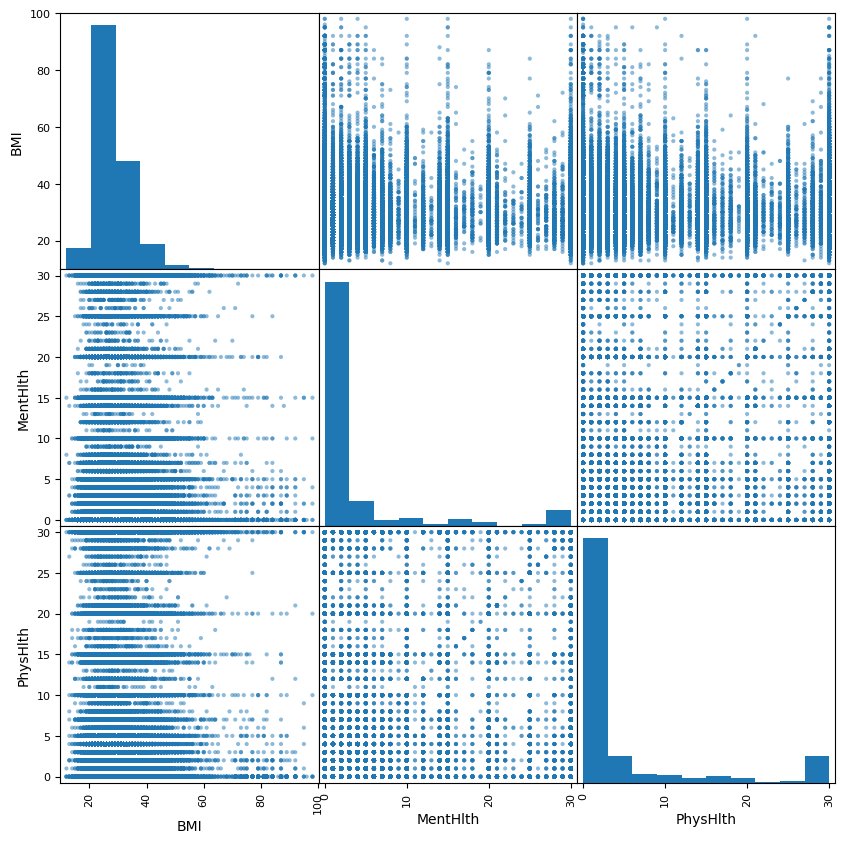

In [10]:
pd.plotting.scatter_matrix(data_raw, figsize=(10, 10))
pass

### Борьба с выбросами

#### Проверка для BMI

In [11]:
data_raw['BMI'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    17.0
0.010    18.0
0.050    20.0
0.100    22.0
0.500    27.0
0.900    36.0
0.950    40.0
0.990    50.0
0.995    55.0
Name: BMI, dtype: float64

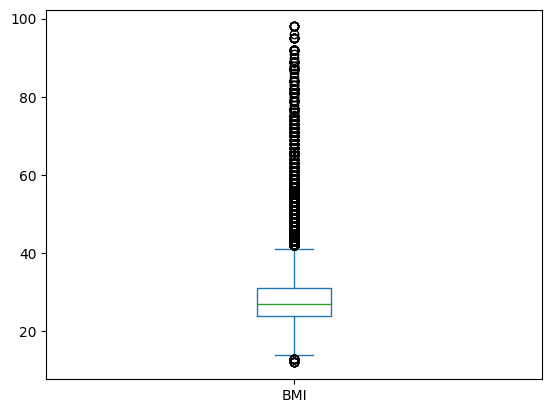

In [12]:
data_raw['BMI'].plot(kind='box')
pass

Отсюда видно, что **99%** всех значений признака `BMI` находятся в диапозоне от `17` до `55`, это значения квантилей **0.005** и **0.995** соответственно

#### Проверка для MentHlth

In [13]:
data_raw['MentHlth'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     0.0
0.010     0.0
0.050     0.0
0.100     0.0
0.500     0.0
0.900    10.0
0.950    26.0
0.990    30.0
0.995    30.0
Name: MentHlth, dtype: float64

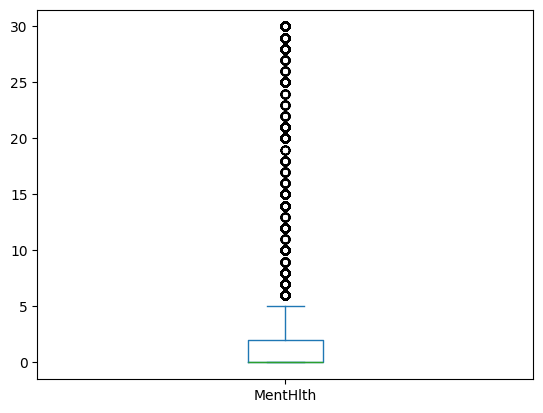

In [14]:
data_raw['MentHlth'].plot(kind='box')
pass

Отсюда видно, что **100%** всех значений признака `MentHlth` находятся в диапозоне от `0` до `30`, это значения квантилей **0.005** и **0.995** соответственно. То есть выбросов нет

#### Проверка для PhysHlth

In [15]:
data_raw['PhysHlth'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     0.0
0.010     0.0
0.050     0.0
0.100     0.0
0.500     0.0
0.900    20.0
0.950    30.0
0.990    30.0
0.995    30.0
Name: PhysHlth, dtype: float64

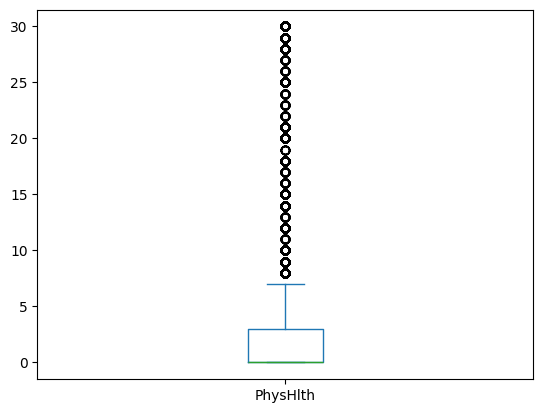

In [16]:
data_raw['PhysHlth'].plot(kind='box')
pass

Отсюда видно, что **100%** всех значений признака `PhysHlth` находятся в диапозоне от `0` до `30`, это значения квантилей **0.005** и **0.995** соответственно. То есть выбросов нет

#### Очистка от выбросов для BMI

Удалим все строки таблицы, которые содержат значения `BMI`, выходящие за пределы квантилей **0.005** и **0.995**

In [17]:
rows_to_drop = data_raw[
    (data_raw['BMI'] < data_raw['BMI'].quantile(0.005)) | (data_raw['BMI'] > data_raw['BMI'].quantile(0.995))
].index
rows_to_drop
data = data_raw.drop(rows_to_drop)
data.shape

(251944, 22)

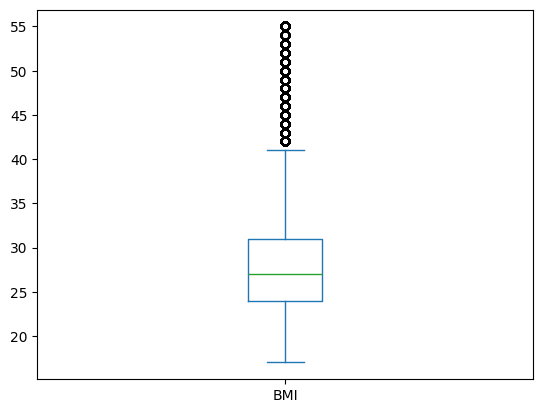

In [18]:
data['BMI'].plot(kind='box')
pass

Посмотрим, что мы имеем после избавления от выбросов

In [19]:
data.describe()

,BMI,MentHlth,PhysHlth
count,251944.000000,251944.000000,251944.000000
mean,28.213833,3.167775,4.208360
std,5.895330,7.390597,8.681304
min,17.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000
75%,31.000000,2.000000,3.000000
max,55.000000,30.000000,30.000000


In [20]:
data.describe(include=['category'])

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education,Income
count,251944.0,251944.0,251944.0,251944.0,251944.0,251944.0,251944.0,251944.0,251944.0,251944.0,251944.0,251944.0,251944.0,251944.0,251944.0,251944.0,251944.0,251944.0,251944.0
unique,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0,2.0,2.0,13.0,6.0,8.0
top,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,9.0,6.0,8.0
freq,228249.0,143991.0,145023.0,242535.0,140329.0,241758.0,212361.0,190923.0,159958.0,204532.0,237752.0,239660.0,230820.0,88733.0,209977.0,140855.0,33037.0,106748.0,89986.0


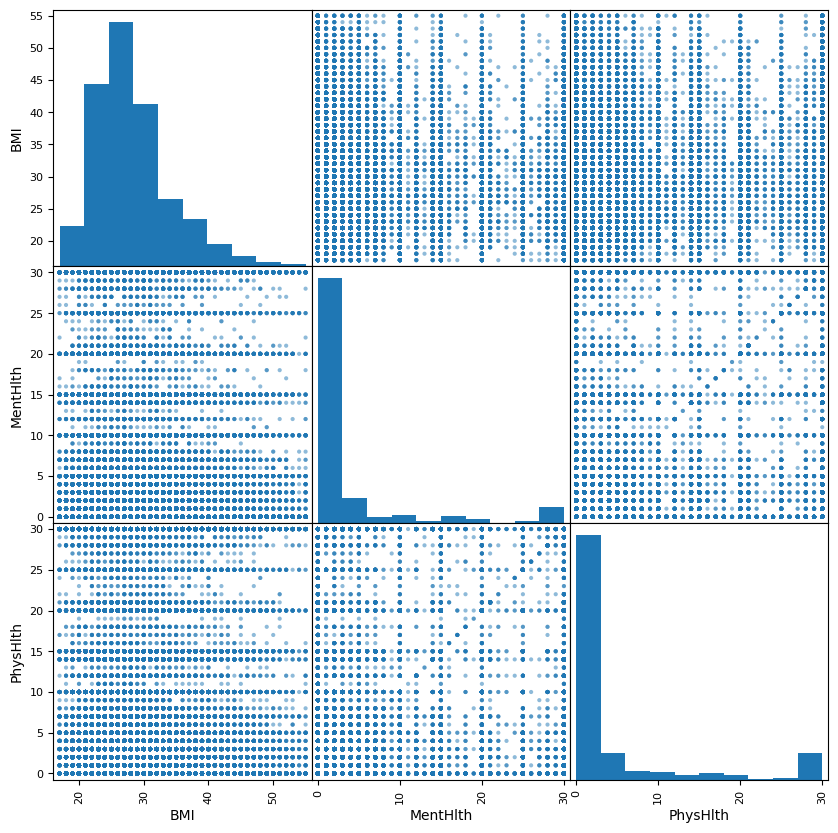

In [21]:
pd.plotting.scatter_matrix(data, figsize=(10, 10))
pass

Теперь можем заметить 
* у людей с большим `BMI` (индексом массы тела) больше проблем с психическим и физическим здоровьем
* у людей с меньшим `MentHlth` (психическим здоровьем) меньшее `PhysHlth` (физическое здоровье). То есть чем лучше психическое здоровьем, тем лучше физическое, и наоборот

### Просмотр и анализ номинальных признаков

HeartDiseaseorAttack
0.0    228249
1.0     23695
Name: count, dtype: int64


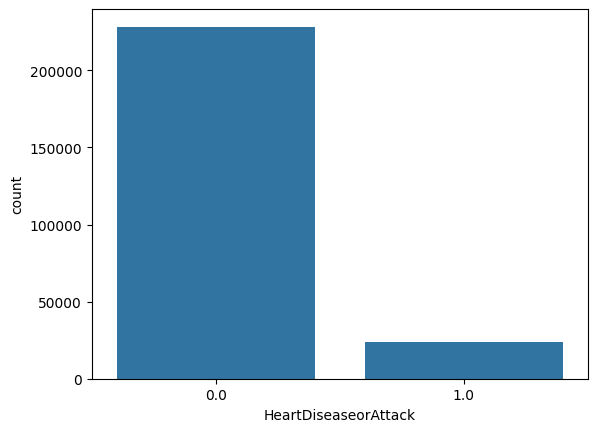

In [22]:
print(data['HeartDiseaseorAttack'].value_counts())
sns.countplot(data, x='HeartDiseaseorAttack')
pass

HighBP
0.0    143991
1.0    107953
Name: count, dtype: int64


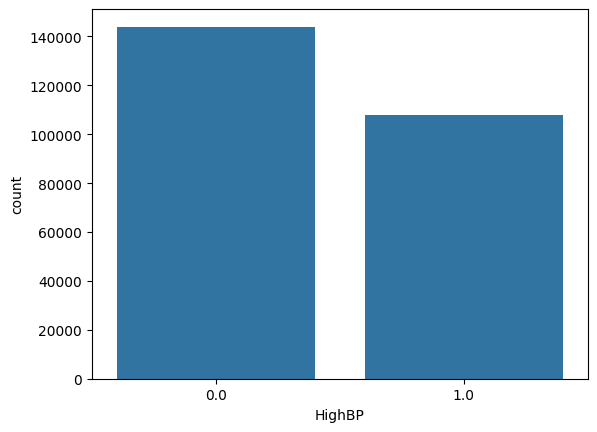

In [23]:
print(data['HighBP'].value_counts())
sns.countplot(data, x='HighBP')
pass

HighChol
0.0    145023
1.0    106921
Name: count, dtype: int64


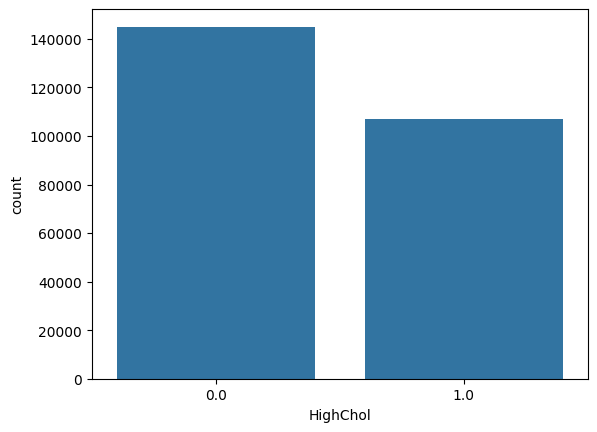

In [24]:
print(data['HighChol'].value_counts())
sns.countplot(data, x='HighChol')
pass

CholCheck
1.0    242535
0.0      9409
Name: count, dtype: int64


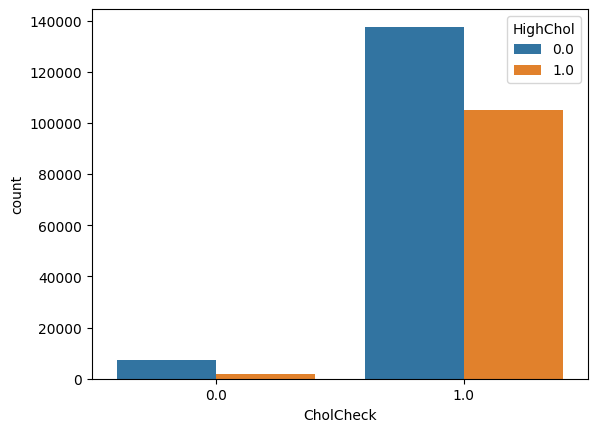

In [25]:
print(data['CholCheck'].value_counts())
sns.countplot(data, x='CholCheck', hue='HighChol')
pass

Smoker
0.0    140329
1.0    111615
Name: count, dtype: int64


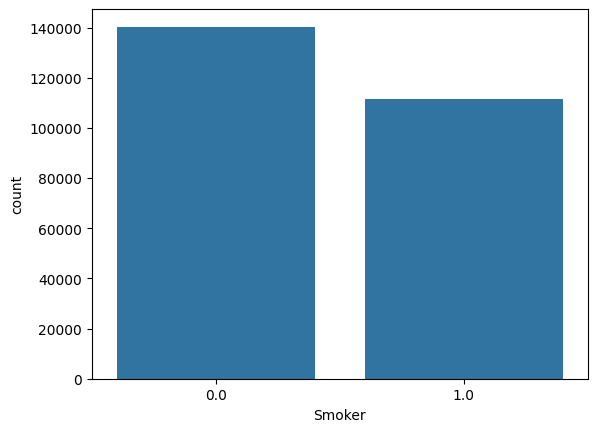

In [26]:
print(data['Smoker'].value_counts())
sns.countplot(data, x='Smoker')
pass

Stroke
0.0    241758
1.0     10186
Name: count, dtype: int64


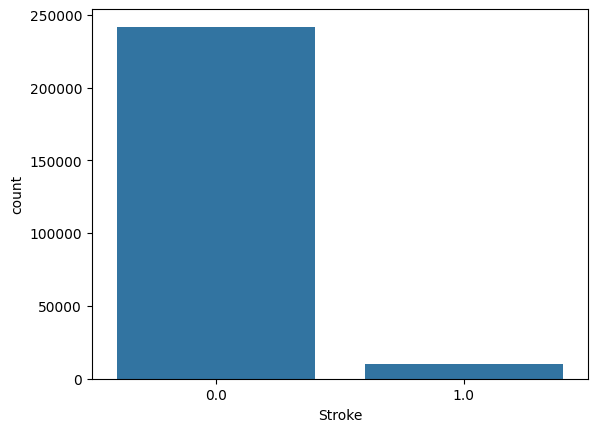

In [27]:
print(data['Stroke'].value_counts())
sns.countplot(data, x='Stroke')
pass

Diabetes
0.0    212361
2.0     34987
1.0      4596
Name: count, dtype: int64


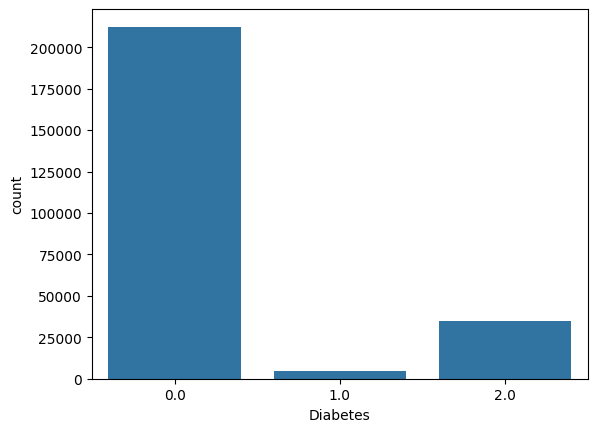

In [28]:
print(data['Diabetes'].value_counts())
sns.countplot(data, x='Diabetes')
pass

PhysActivity
1.0    190923
0.0     61021
Name: count, dtype: int64


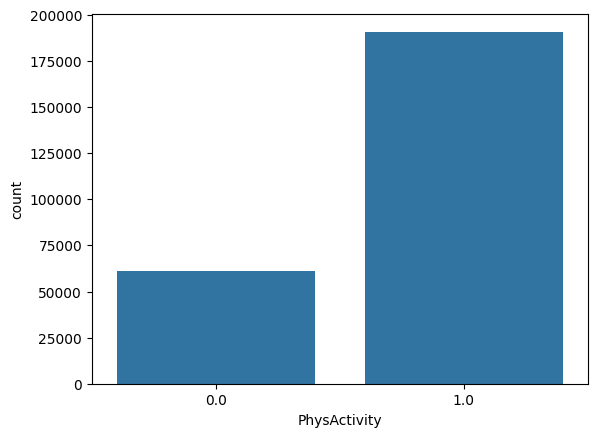

In [29]:
print(data['PhysActivity'].value_counts())
sns.countplot(data, x='PhysActivity')
pass

Fruits
1.0    159958
0.0     91986
Name: count, dtype: int64


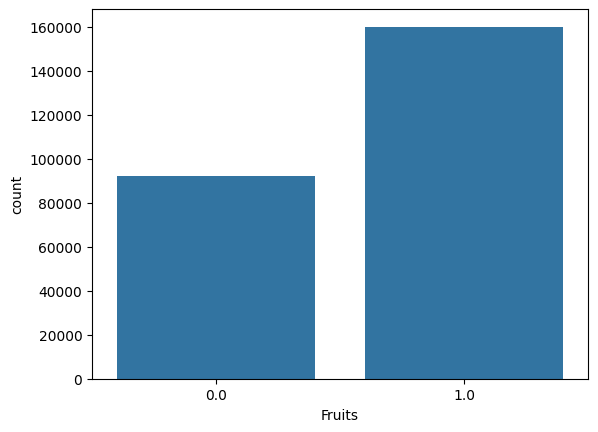

In [30]:
print(data['Fruits'].value_counts())
sns.countplot(data, x='Fruits')
pass

Veggies
1.0    204532
0.0     47412
Name: count, dtype: int64


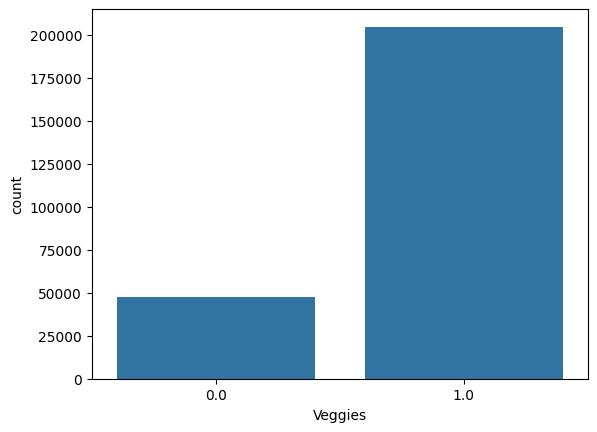

In [31]:
print(data['Veggies'].value_counts())
sns.countplot(data, x='Veggies')
pass

HvyAlcoholConsump
0.0    237752
1.0     14192
Name: count, dtype: int64


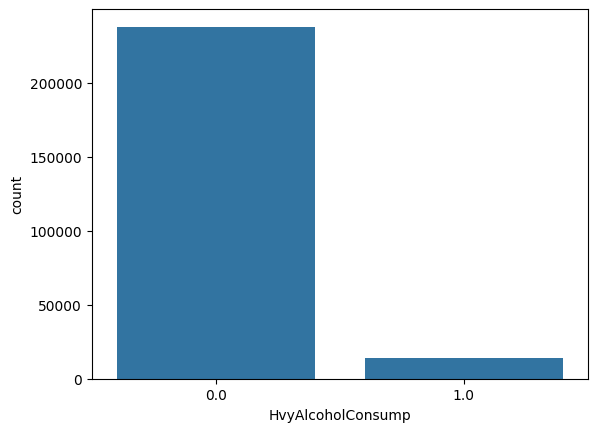

In [32]:
print(data['HvyAlcoholConsump'].value_counts())
sns.countplot(data, x='HvyAlcoholConsump')
pass

Sex
0.0    140855
1.0    111089
Name: count, dtype: int64


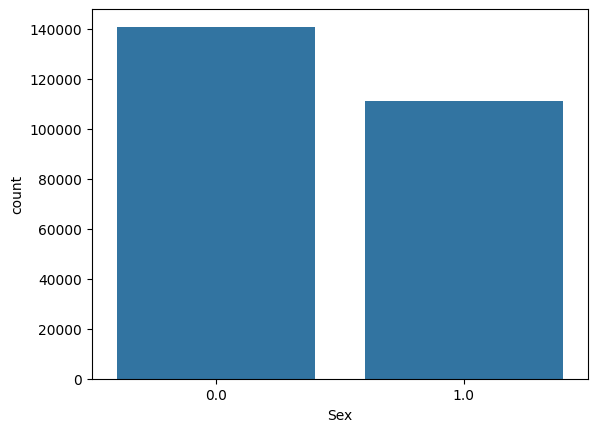

In [33]:
print(data['Sex'].value_counts())
sns.countplot(data, x='Sex')
pass

Age
9.0     33037
10.0    32006
8.0     30592
7.0     26110
11.0    23435
6.0     19665
13.0    17264
5.0     16026
12.0    15902
4.0     13730
3.0     10991
2.0      7530
1.0      5656
Name: count, dtype: int64


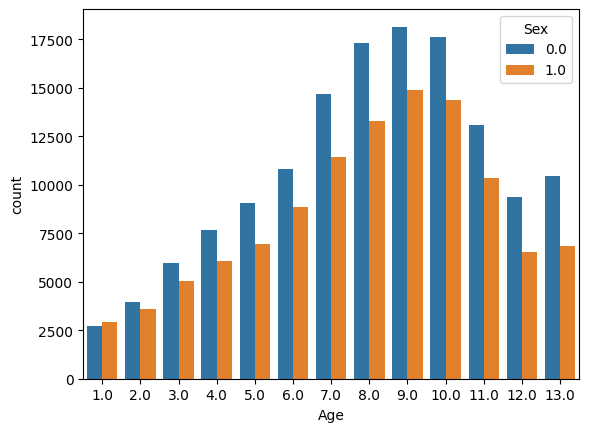

In [34]:
print(data['Age'].value_counts())
sns.countplot(data, x='Age', hue='Sex')
pass

Education
6.0    106748
5.0     69383
4.0     62284
3.0      9367
2.0      3991
1.0       171
Name: count, dtype: int64


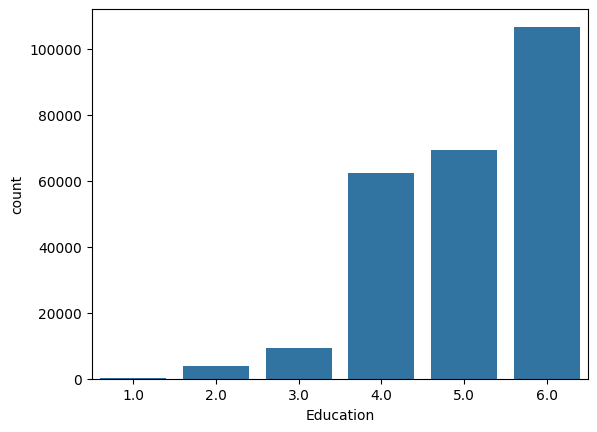

In [35]:
print(data['Education'].value_counts())
sns.countplot(data, x='Education')
pass

Income
8.0    89986
7.0    42993
6.0    36261
5.0    25707
4.0    19944
3.0    15815
2.0    11593
1.0     9645
Name: count, dtype: int64


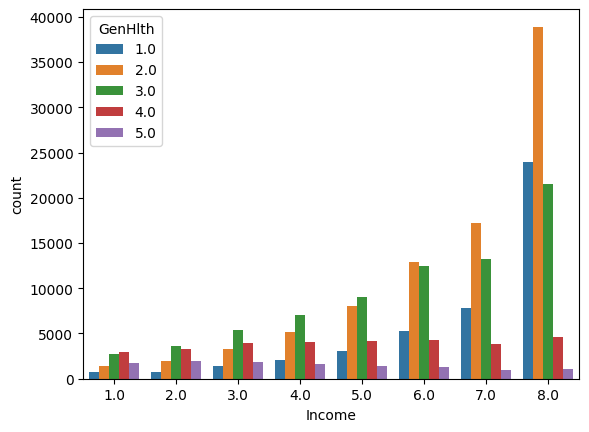

In [36]:
print(data['Income'].value_counts())
sns.countplot(data, x='Income', hue='GenHlth')
pass

AnyHealthcare
1.0    239660
0.0     12284
Name: count, dtype: int64


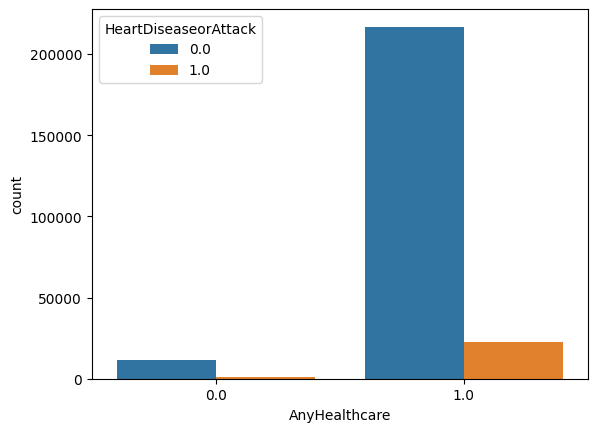

In [37]:
print(data['AnyHealthcare'].value_counts())
sns.countplot(data, x='AnyHealthcare', hue='HeartDiseaseorAttack')
pass

Вычислим матрицу корреляции для количественнх признаков:

In [38]:
corr_mat = data.corr(numeric_only = True)
corr_mat

,BMI,MentHlth,PhysHlth
BMI,1.000000,0.088328,0.125225
MentHlth,0.088328,1.000000,0.352034
PhysHlth,0.125225,0.352034,1.000000


Для большего удобства используем визуальный образ этой матрицы:

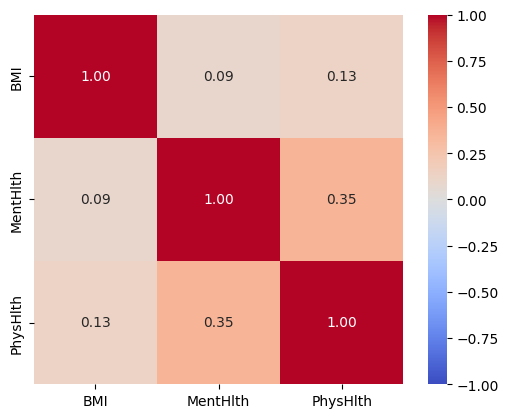

In [39]:
sns.heatmap(corr_mat, square=True, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')
pass

Выведем коэффициенты корреляции, большие заданного значения:

In [40]:
corr_mat > 0.5

,BMI,MentHlth,PhysHlth
BMI,True,False,False
MentHlth,False,True,False
PhysHlth,False,False,True


In [41]:
np.triu(corr_mat, k=1)

array([[0.        , 0.08832835, 0.12522476],
       [0.        , 0.        , 0.35203376],
       [0.        , 0.        , 0.        ]])

In [42]:
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack()

Series([], dtype: float64)

Следовательно, какая-либо сильная коррекляция между количественными признаками отсутствует

## 3. Обработка пропущенных значений

In [43]:
data.isna().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Пропущеных значений нет, следовательно в обработке не нуждается

## Обработка категориальных признаков

Категориальные _бинарные_ признаки не нужно приводить к числовым, они уже представлены в числовом виде **0** и **1**

К _небинарным_ категориальным признакам применим метод бинаризации:

In [44]:
nonbinaries = pd.get_dummies(data[['Diabetes', 'GenHlth', 'Age', 'Education', 'Income']])
print(nonbinaries.columns)

Index(['Diabetes_0.0', 'Diabetes_1.0', 'Diabetes_2.0', 'GenHlth_1.0',
       'GenHlth_2.0', 'GenHlth_3.0', 'GenHlth_4.0', 'GenHlth_5.0', 'Age_1.0',
       'Age_2.0', 'Age_3.0', 'Age_4.0', 'Age_5.0', 'Age_6.0', 'Age_7.0',
       'Age_8.0', 'Age_9.0', 'Age_10.0', 'Age_11.0', 'Age_12.0', 'Age_13.0',
       'Education_1.0', 'Education_2.0', 'Education_3.0', 'Education_4.0',
       'Education_5.0', 'Education_6.0', 'Income_1.0', 'Income_2.0',
       'Income_3.0', 'Income_4.0', 'Income_5.0', 'Income_6.0', 'Income_7.0',
       'Income_8.0'],
      dtype='object')


In [45]:
data = pd.concat((data, nonbinaries), axis=1).drop(['Diabetes', 'GenHlth', 'Age', 'Education', 'Income'], axis=1)

In [46]:
data.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,PhysActivity,Fruits,Veggies,...,Education_5.0,Education_6.0,Income_1.0,Income_2.0,Income_3.0,Income_4.0,Income_5.0,Income_6.0,Income_7.0,Income_8.0
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,...,False,False,False,False,True,False,False,False,False,False
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,1.0,0.0,0.0,...,False,True,True,False,False,False,False,False,False,False
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,True
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,1.0,1.0,1.0,...,False,False,False,False,False,False,False,True,False,False
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,1.0,1.0,1.0,...,True,False,False,False,False,True,False,False,False,False


## 5. Нормализация

Перед применением алгоритмов машинного обучения количественные признаки полезно нормализовать

Наиболее часто используют один из трех следующих способов:
* _приведение к отрезку_ **\[0, 1\]**- это линейное преобразование, приводящее все значения к заданному отрезку
* _стандартизация_ - линейное преобразование, приводящее все значения к нулевому среднему и единичному стандартному отклонению
* _нормализация_ - приведение данных к единичной норме

Выполним стандартизацию всех признаков:

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
data = pd.DataFrame(scaler.transform(data), columns=data.columns, index=data.index)
data.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,PhysActivity,Fruits,Veggies,...,Education_5.0,Education_6.0,Income_1.0,Income_2.0,Income_3.0,Income_4.0,Income_5.0,Income_6.0,Income_7.0,Income_8.0
count,2.519440e+05,2.519440e+05,2.519440e+05,2.519440e+05,2.519440e+05,2.519440e+05,2.519440e+05,2.519440e+05,2.519440e+05,2.519440e+05,...,2.519440e+05,2.519440e+05,2.519440e+05,2.519440e+05,2.519440e+05,2.519440e+05,2.519440e+05,2.519440e+05,2.519440e+05,2.519440e+05
mean,2.493093e-17,1.204807e-16,-1.112585e-16,8.844275e-17,1.333410e-16,5.414862e-18,-3.677594e-17,4.873376e-17,9.430885e-17,-4.715443e-17,...,6.610644e-17,1.552261e-16,2.165945e-17,8.212541e-17,-5.144119e-17,5.098995e-17,-1.647021e-17,1.443963e-17,1.082972e-16,3.609908e-18
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-3.221988e-01,-8.658640e-01,-8.586438e-01,-5.077097e+00,-1.902159e+00,-8.918413e-01,-2.052633e-01,-1.768844e+00,-1.318688e+00,-2.077000e+00,...,-6.164850e-01,-8.574376e-01,-1.995149e-01,-2.196215e-01,-2.587974e-01,-2.931988e-01,-3.370885e-01,-4.100265e-01,-4.536038e-01,-7.453946e-01
25%,-3.221988e-01,-8.658640e-01,-8.586438e-01,1.969629e-01,-7.147762e-01,-8.918413e-01,-2.052633e-01,5.653411e-01,-1.318688e+00,4.814637e-01,...,-6.164850e-01,-8.574376e-01,-1.995149e-01,-2.196215e-01,-2.587974e-01,-2.931988e-01,-3.370885e-01,-4.100265e-01,-4.536038e-01,-7.453946e-01
50%,-3.221988e-01,-8.658640e-01,-8.586438e-01,1.969629e-01,-2.058978e-01,-8.918413e-01,-2.052633e-01,5.653411e-01,7.583294e-01,4.814637e-01,...,-6.164850e-01,-8.574376e-01,-1.995149e-01,-2.196215e-01,-2.587974e-01,-2.931988e-01,-3.370885e-01,-4.100265e-01,-4.536038e-01,-7.453946e-01
75%,-3.221988e-01,1.154916e+00,1.164627e+00,1.969629e-01,4.726067e-01,1.121276e+00,-2.052633e-01,5.653411e-01,7.583294e-01,4.814637e-01,...,1.622099e+00,1.166266e+00,-1.995149e-01,-2.196215e-01,-2.587974e-01,-2.931988e-01,-3.370885e-01,-4.100265e-01,-4.536038e-01,1.341571e+00
max,3.103674e+00,1.154916e+00,1.164627e+00,1.969629e-01,4.543634e+00,1.121276e+00,4.871790e+00,5.653411e-01,7.583294e-01,4.814637e-01,...,1.622099e+00,1.166266e+00,5.012157e+00,4.553287e+00,3.864026e+00,3.410656e+00,2.966580e+00,2.438867e+00,2.204567e+00,1.341571e+00


## 6. Разбиение данных на обучающую и тестовую выборки

Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (7.5% - обучающая выборка, 2.5% - тестовая. При 75% - обучающая выборка, 25% - тестовая долго отрабатывает):

In [48]:
X = data_raw.drop(['HeartDiseaseorAttack'], axis=1)
y = data_raw['HeartDiseaseorAttack']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.075, test_size = 0.025, random_state = 42)

N_train, _ = X_train.shape
N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(19026, 6342)

## 7. Запустить классификатор (ререссию) ближайших соседей

Используем классификатор k ближайших соседей

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [50]:
neighbors = [1, 2, 3, 4, 5, 7, 9, 11, 13, 15, 20, 25, 30, 35, 40]
errors = []
for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k, p=2)
    model.fit(X_train, y_train)
    errors.append((k, float(1 - model.score(X_train, y_train)), float(1 - model.score(X_test, y_test))))

## 8. Вычислить ошибки на обучающей и тестовой выборках. Выбрать оптимальное значение гиперпараметра (к-ва ближайших соседей). Сделать выводы 

In [51]:
from pprint import pprint
print('Количество соседей, Ошибка на обучающей выборке, Ошибка на тестовой выборке')
pprint(errors)

Количество соседей, Ошибка на обучающей выборке, Ошибка на тестовой выборке
[(1, 0.0005255965520866157, 0.14143803216650896),
 (2, 0.07473982970671711, 0.10012614317250079),
 (3, 0.07184904867024078, 0.11384421318196147),
 (4, 0.08430568695469354, 0.09823399558498891),
 (5, 0.08236097971197309, 0.10532954903815828),
 (7, 0.08824766109534321, 0.1023336486912646),
 (9, 0.0914012404078629, 0.09823399558498891),
 (11, 0.09171659833911494, 0.09744560075685904),
 (13, 0.09329338799537479, 0.09665720592872906),
 (15, 0.09371386523704406, 0.09665720592872906),
 (20, 0.09465993903079994, 0.09444970040996536),
 (25, 0.09476505834121729, 0.09397666351308731),
 (30, 0.09471249868600862, 0.09366130558183539),
 (35, 0.09476505834121729, 0.09413434247871333),
 (40, 0.09460737937559127, 0.09397666351308731)]


In [52]:
optimal_error = min(errors, key=lambda error: error[2])
model = KNeighborsClassifier(n_neighbors=optimal_error[0], p=2)
model.fit(X_train, y_train)

print('Оптимальное количество соседей, k: ', optimal_error[0])
print('Оптимальная (минимальная) ошибка на тестовой выборке: ', optimal_error[2])

Оптимальное количество соседей, k:  30
Оптимальная (минимальная) ошибка на тестовой выборке:  0.09366130558183539


Посмотрим на метрики

In [53]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [54]:
from sklearn.metrics import mean_squared_error, r2_score

RMSE_train = mean_squared_error(y_train, y_train_predict) ** .5
RMSE_test  = mean_squared_error(y_test,  y_test_predict) ** .5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

In [55]:
RMSE_table = pd.DataFrame(columns=('train', 'test'))
RMSE_table.loc['k Nearest Neighbours', :] = (RMSE_train, RMSE_test)
RMSE_table

,train,test
k Nearest Neighbours,0.307754,0.306041


In [56]:
R2_table = pd.DataFrame(columns=('train', 'test'))
R2_table.loc['k Nearest Neighbours', :] = (R2_train, R2_test)
R2_table

,train,test
k Nearest Neighbours,-0.102978,-0.106683


Посмотрим на матрицу рассоглосования для метода k ближайших соседей с оптимальным k

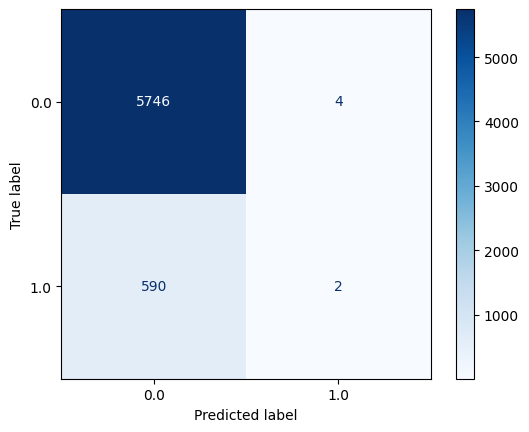

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)
pass

Большая часть ошибок `FN` (false negative) говорит о том, что для людей с заболеванием сердца алгоритм предсказывает отсутствие болезни

## Выводы

**Задача.** Спрогнозировать риск сердечно-сосудистых заболеваний

В данном датасете нет пропущенных значений, поэтому их не нужно обрабатывать
Так же в датасете есть несбалансированные классы (**90/10** - люди без заболеваний сердца и люди c заболеванием сердца соответственно). Была проведена балансировка классов.
Количество выбросов: **~0.7%**

Для решения задачи использовался классификатор k ближайших соседей, причем были проведены вычисления при разном значениии параметра k соседей. Получил оптимальное число соседей **k=30**. Ошибка на тестовой выборке при **k=30**: **0.09366130558183539**, причем большая часть ошибок вида `FN` – false negative (для людей с заболеванием сердца предсказывает отсутствие болезни) и практически полное отсутствие истинно положительных примеров `TP` - true positive. Если сбалансировать классы, то, скорее всего, количество `TP` вырастет

Такой метод классификации не подходит для решения данной задачи

## Логистическая регрессия

In [58]:
from sklearn import model_selection
cv = model_selection.ShuffleSplit(n_splits = 10, train_size = 0.075, test_size = 0.025, random_state = 0)

In [59]:
from sklearn.model_selection import learning_curve

In [68]:
def draw_learning_curve(model, X = X, y = y, cv = cv, 
                       train_sizes = np.linspace(0.1, 1.0, 5)):

    sizes, scores_train, scores_test = learning_curve(model, X, y, cv = cv, 
                train_sizes = train_sizes)

    err_train = 1 - scores_train
    err_test  = 1 - scores_test

    mean_err_train = np.mean(err_train, axis = 1)
    std_err_train  = np.std (err_train, axis = 1)
    mean_err_test  = np.mean(err_test,  axis = 1)
    std_err_test   = np.std (err_test,  axis = 1)

    plt.figure(figsize = (8, 6))
    plt.fill_between(sizes, mean_err_train - std_err_train, mean_err_train + std_err_train, alpha = 0.15, 
                     color = "r")
    plt.fill_between(sizes, mean_err_test  - std_err_test,  mean_err_test  + std_err_test,  alpha = 0.15, 
                     color = "m")
    plt.plot(sizes, mean_err_train, 'ro-', markeredgecolor = 'r', label = "Train error")
    plt.plot(sizes, mean_err_test,  'mo-', markeredgecolor = 'm', label = "CV error")
    plt.xlabel('N')
    plt.ylabel('Error')
    plt.grid()
    plt.legend(loc = 'best')

Text(0.5, 1.0, 'Logistic regression')

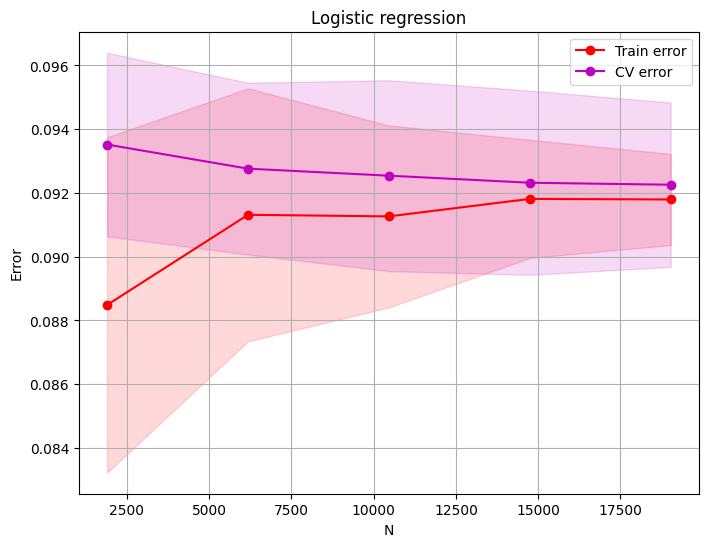

In [70]:
from sklearn.linear_model import LogisticRegression
draw_learning_curve(LogisticRegression(max_iter = 600))
plt.title('Logistic regression')

Небольшой разброс, большое смещение

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.075, test_size = 0.025, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(19026, 6342)

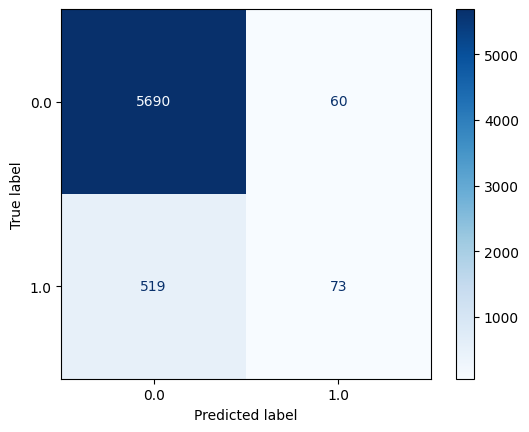

In [72]:
model = LogisticRegression(max_iter=600)
model.fit(X_train, y_train)

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)

### Random Forest

Text(0.5, 1.0, 'Random Forest Classifier')

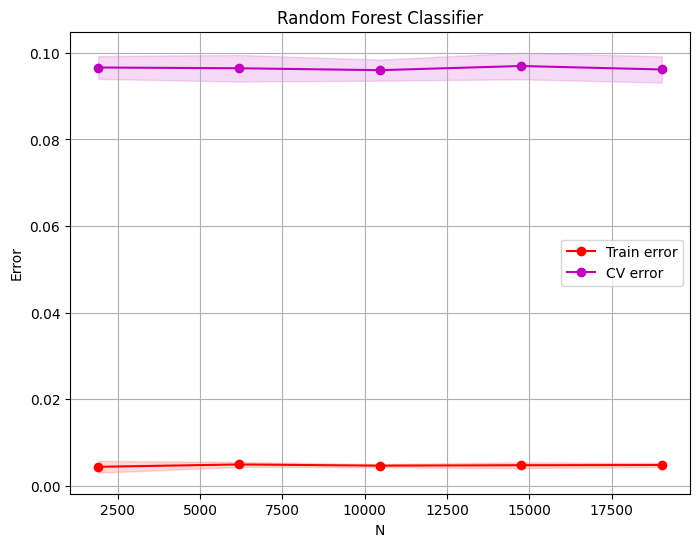

In [73]:
from sklearn.ensemble import RandomForestClassifier
draw_learning_curve(RandomForestClassifier(n_estimators = 20))
plt.title('Random Forest Classifier')

Большой разброс => переобучение

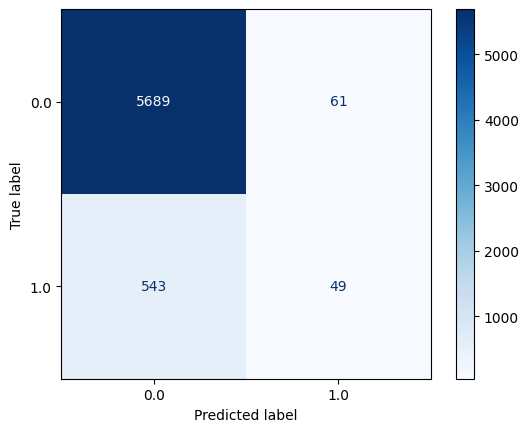

In [74]:
model = RandomForestClassifier(n_estimators = 20)
model.fit(X_train, y_train)

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)

### Полносвязная нейронная сеть

Text(0.5, 1.0, 'Fully connected neural network')

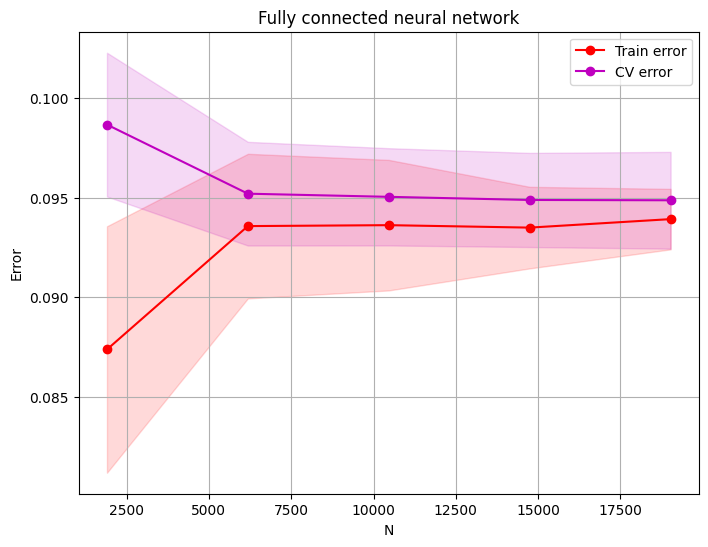

In [75]:
from sklearn.neural_network import MLPClassifier
draw_learning_curve(MLPClassifier(hidden_layer_sizes = (5), max_iter=600, random_state = 42))
plt.title('Fully connected neural network')

Небольшой разброс, большое смещение

Найдем оптимальное значение параметра $\alpha$ и количество нейронов

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.075, test_size = 0.025, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

In [ ]:
from sklearn.neural_network import MLPClassifier
alpha_arr = np.logspace(-5, 5, 3)
neurons_arr = np.linspace(1, 10, 3)
test_err = []
train_err = []

for neuron in neurons_arr:
    test_err.append([])
    train_err.append([])
    for alpha in alpha_arr:
        mlp_model = MLPClassifier(hidden_layer_sizes = (int(neuron)), max_iter=100, random_state = 42, alpha = alpha)
        mlp_model.fit(X_train, y_train)

        y_train_pred = mlp_model.predict(X_train)
        y_test_pred = mlp_model.predict(X_test)
        train_err[int(neuron) - 1].append(np.mean(y_train != y_train_pred))
        test_err[int(neuron) - 1].append(np.mean(y_test != y_test_pred))

In [ ]:
for i in range(0, 10):
    plt.semilogx(alpha_arr, train_err[i], 'b-o', label = 'train n = ' + str(i + 1))
    plt.semilogx(alpha_arr, test_err[i], 'r-o', label = 'test n = ' + str(i + 1))
plt.title('Error vs. alpha vs. count neurons')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

Можно заметить, что ни одна вариация парметра $\alpha$ и количества нейронов не уменьшила ошибку должным образом, найдем оптимальные параметры $\alpha$ и количества нейронов

In [ ]:
min_test_err_arr = []

for i in range(0, 10):
    min_test_err_arr.append(np.min(test_err[i]))

min_test_err = np.min(min_test_err_arr)
res_n = [i for i, j in enumerate(min_test_err_arr) if j == min_test_err]

res_a = [i for i, j in enumerate(test_err[res_n[0]]) if j == min_test_err]
    
print('Count neurons = ', int(neurons_arr[res_n[0]]))
print('Parameter a = ', alpha_arr[res_a[0]])
print('Minimum test error = ', min_test_err)

In [ ]:
model = MLPClassifier(hidden_layer_sizes = (int(neurons_arr[res_n[0]])), max_iter=600, random_state = 42, alpha = alpha_arr[res_a[0]])
model.fit(X_train, y_train)

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)

Во всех случаях получаем тот же результат, что и при использовании классификатора с $k$ ближайшими соседями: большая часть ошибок, ошибки типа `FN`
 – false negative (для людей с заболеванием сердца предсказывает отсутствие болезни) Очень малоее число`TP`
 – true positive, истинно положительных примеров

#### Выводы
По заданию к 29 декабря были запущены другие классификаторы: логистическая регрессия, random forest, нейронные сети. На них получились схожие результаты с исходным решением. Можно сделать предположение, что текущий набор данных плохо подходит для решения поставленой задачи

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Создаем объекты моделей
logreg = LogisticRegression()
rf = RandomForestClassifier()
mlp = MLPClassifier(hidden_layer_sizes=[50, 100])

# Обучаем модели на обучающей выборке
logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)
mlp.fit(X_train, y_train)